In [1]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
# グラフのインライン表示
%matplotlib inline

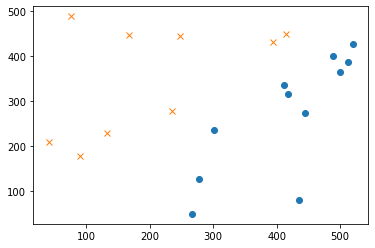

In [2]:
# 学習データを読み込む
data = np.loadtxt('negaposi.csv', # 読み込むファイル
                   delimiter=',', # 区切り文字を指定
                   skiprows=1     # 1行目のタイトルを読み飛ばす
                   )
x = data[:,0:2] # 1～2列目の成分をxに代入
t = data[:,2]   # 2列目の成分をtに代入

# y軸の範囲を設定
x1 = np.arange(0, 600) 

# 分類ラベルが1のデータをドットでプロット
plt.plot(
    x[t ==  1, 0], x[t ==  1, 1], 'o'
    )
# 分類ラベルが－1のデータをxでプロット
plt.plot(
    x[t == -1, 0], x[t == -1, 1], 'x'
    )
# グラフを表示
plt.show()

In [3]:
def classify(x, w):
    '''パーセプトロン（分類関数）
    
       Parameters:
         x(ndarray): x1、x2のデータ
         w(ndarray): w1、w2の値
       Returns:
         (float)更新後の重み w1、w2
    '''
    if np.dot(w, x) >= 0:
        return 1  # w・x≧0 なら1を返す
    else:
        return -1 # w・x＜0 なら－1を返す

In [4]:
def learn_weights(x, t):
    '''更新式で重みを学習する
    
       Parameters:
         x(ndarray): x1、x2のデータ
         w(ndarray): t(正解ラベル)
       Returns:
         (int)更新後のw(重み)
    '''
    w = np.random.rand(2) # 重みの初期化  
    epochs = 5            # 学習を繰り返す回数
    count = 0             # 繰り返しの回数をカウントする変数

    # 指定した回数だけ重みの学習を繰り返す
    for i in range(epochs):
        # ベクトルx、tから成分を取り出す
        for element_x, element_t in zip(x, t):
            # 分類関数の出力が異なる場合は重みを更新する
            if classify(element_x, w) != element_t:
                w = w + element_t * element_x
                print('更新後のw = ', w)
        count += 1
        # ログの出力
        print('[{}回目]: w = {}***'.format(count, w))
    return w

In [5]:
# 訓練データで学習を行う

w = learn_weights(x, t)           # 重みw1、w2の値を求める

更新後のw =  [ -40.53538272 -207.1340869 ]
更新後のw =  [448.46461728 191.8659131 ]
更新後のw =  [ 200.46461728 -253.1340869 ]
更新後のw =  [611.46461728  82.8659131 ]
更新後のw =  [ 197.46461728 -365.1340869 ]
更新後のw =  [615.46461728 -50.1340869 ]
更新後のw =  [ 221.46461728 -481.1340869 ]
[1回目]: w = [ 221.46461728 -481.1340869 ]***
更新後のw =  [710.46461728 -82.1340869 ]
更新後のw =  [ 462.46461728 -527.1340869 ]
[2回目]: w = [ 462.46461728 -527.1340869 ]***
[3回目]: w = [ 462.46461728 -527.1340869 ]***
[4回目]: w = [ 462.46461728 -527.1340869 ]***
[5回目]: w = [ 462.46461728 -527.1340869 ]***


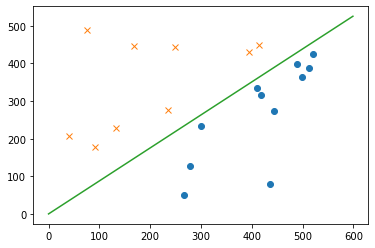

In [6]:
# 訓練データと区分線をプロット

# 軸の範囲を設定
x1 = np.arange(0, 600)    
# 分類ラベルが1のデータをドットでプロット
plt.plot(
    x[t ==  1, 0], x[t ==  1, 1], 'o'
    )
# 分類ラベルが－1のデータをxでプロット
plt.plot(
    x[t == -1, 0], x[t == -1, 1], 'x'
    )
# 境界線をプロット
plt.plot(
    x1, -w[0] / w[1] * x1, linestyle='solid'
    )
plt.show()

In [7]:
classify([500, 100], w)

1